# Data Cleaning, Explorative Analysis, Salary Trend

## Objectives
- What are the earnings of each job title (Data Scientist, Data Analyst, Analyst Consultant, Data Engineer, Machine Learning Engineer)?
- What regional trends can be observed in the salaries? (Please see our tableau presentation)
- How do salaries differ by job titles and levels of experience?
- Which roles offer the highest earnings?
- Which skills offer the highest earnings?
- Further observations, correlations.
- Prediction model of salaries based on skills and level of experience


## Loading the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Tableau2.csv")
df.head()

,Job_Title,Company,Location,Salary_Min,Salary_Max,Description,Extracted_Skills,Longitude,Latitude,URL,...,pytorch,python,r,sql,snowflake,spark,tableau,tensorflow,Avg_Salary,Skills
0,Data Engineer,Catch Recruit,"Sandton, North Johannesburg",12960.0,22680.0,Key Responsibilities - Develop and maintain sc...,[],28.048330,-26.068610,https://www.adzuna.co.za/details/5012435460?ut...,...,0,0,0,0,0,0,0,0,17820.0,"['Docker', 'kafka', 'kubernetes']"
1,Machine Learning Engineer,TN Italy,"Provincia di Brescia, Lombardia",54500.0,76300.0,Social network you want to login/join with: Ma...,[],10.263698,45.651602,https://www.adzuna.it/land/ad/5083567845?se=xq...,...,0,0,0,0,0,0,0,0,65400.0,['machine_learning']
2,Data Engineer,Unit8,"Warszawa, mazowieckie",66000.0,84000.0,"Who We Are Founded in 2017, Unit8 is a fast-gr...",[],21.245300,52.215190,https://www.adzuna.pl/land/ad/5077274837?se=5N...,...,0,0,1,0,0,0,0,0,75000.0,['r']
3,Data Engineer,Unit8,"Wrocław, dolnośląskie",66000.0,84000.0,"Who We Are Founded in 2017, Unit8 is a fast-gr...",[],17.038540,51.107890,https://www.adzuna.pl/land/ad/5077279762?se=5N...,...,0,0,1,0,0,0,0,0,75000.0,['r']
4,Data Engineer,Unit8,"Kraków, małopolskie",66000.0,84000.0,"Who We Are Founded in 2017, Unit8 is a fast-gr...",[],20.178480,50.102400,https://www.adzuna.pl/land/ad/5077279767?se=5N...,...,0,0,1,0,0,0,0,0,75000.0,['r']


## Understanding the Dataset

#### Key Infos:
- Data is collected through webscraping the Adzuna Job Portal.
  *(See separate Jupyter Notebook: **"1_Web_Adzuna_Scraping.ipynb"** for how the data was gathered).*
- Salaries are expressed in USD.  
  *(See separate Jupyter Notebook: **"Cleaned_Salary_Title_Experience_Numeric_Final.ipynb"** for how the salaries were treated).*


### Checking & cleaning the datatype

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job_Title         2244 non-null   object 
 1   Company           2191 non-null   object 
 2   Location          2244 non-null   object 
 3   Salary_Min        2244 non-null   float64
 4   Salary_Max        2243 non-null   float64
 5   Description       2244 non-null   object 
 6   Extracted_Skills  2244 non-null   object 
 7   Longitude         2244 non-null   float64
 8   Latitude          2244 non-null   float64
 9   URL               2244 non-null   object 
 10  Created           2244 non-null   object 
 11  Experience_years  2244 non-null   int64  
 12  Experience_Level  2244 non-null   object 
 13   Scikit_Learn     2244 non-null   int64  
 14  AWS               2244 non-null   int64  
 15  Docker            2244 non-null   int64  
 16  Google_Analytics  2244 non-null   int64  


### Checking the columns

In [5]:
df.columns

Index(['Job_Title', 'Company', 'Location', 'Salary_Min', 'Salary_Max',
       'Description', 'Extracted_Skills', 'Longitude', 'Latitude', 'URL',
       'Created', 'Experience_years', 'Experience_Level', ' Scikit_Learn',
       'AWS', 'Docker', 'Google_Analytics', 'apache_airflow', 'azure',
       'big_data', 'data_pipelines', 'deep_learning', 'etl', 'gcp', 'hadoop',
       'java', 'kpi', 'kafka', 'kubernetes', 'machine_learning', 'pandas',
       'power_bi', 'pytorch', 'python', 'r', 'sql', 'snowflake', 'spark',
       'tableau', 'tensorflow', 'Avg_Salary', 'Skills'],
      dtype='object')

### Conversion to Numerical Datasplit

#### Experience Level

In [6]:
print(df["Experience_Level"].unique())

['junior' 'mid_level' 'senior' 'expert']


In [7]:
from sklearn.preprocessing import OrdinalEncoder

experience_order = [["junior", "mid_level", "senior", "expert"]]
encoder = OrdinalEncoder(categories=experience_order)

df["Experience_Level_Encoded"] = encoder.fit_transform(df[["Experience_Level"]])

print(df[["Experience_Level", "Experience_Level_Encoded"]].head(20))


   Experience_Level  Experience_Level_Encoded
0            junior                       0.0
1            junior                       0.0
2         mid_level                       1.0
3         mid_level                       1.0
4         mid_level                       1.0
5            senior                       2.0
6            junior                       0.0
7            expert                       3.0
8            expert                       3.0
9            expert                       3.0
10           expert                       3.0
11           junior                       0.0
12        mid_level                       1.0
13           senior                       2.0
14           expert                       3.0
15           senior                       2.0
16           senior                       2.0
17           expert                       3.0
18           expert                       3.0
19           expert                       3.0


#### Job Title

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Job_Title_Encoded"] = label_encoder.fit_transform(df["Job_Title"])

print(df[["Job_Title", "Job_Title_Encoded"]].head())

job_title_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Job Title Mapping:", job_title_mapping)


                   Job_Title  Job_Title_Encoded
0              Data Engineer                  2
1  Machine Learning Engineer                  4
2              Data Engineer                  2
3              Data Engineer                  2
4              Data Engineer                  2
Job Title Mapping: {'Analytics Consultant': np.int64(0), 'Data Analyst': np.int64(1), 'Data Engineer': np.int64(2), 'Data Scientist': np.int64(3), 'Machine Learning Engineer': np.int64(4)}


## Rounding up column "Avg_Salary" to the nearest 5000

In [9]:
def round_up_5000(x):
    return np.ceil(x / 5000) * 5000 if not np.isnan(x) else np.nan

In [10]:
# Create the new column Avg_Salary_Rounded based on Avg_Salary
df["Avg_Salary_Rounded"] = df["Avg_Salary"].apply(round_up_5000)

In [11]:
# Display the first few rows to verify the new column
df[["Avg_Salary", "Avg_Salary_Rounded"]].head()

,Avg_Salary,Avg_Salary_Rounded
0,17820.0,20000.0
1,65400.0,70000.0
2,75000.0,75000.0
3,75000.0,75000.0
4,75000.0,75000.0


In [12]:
df.head()

,Job_Title,Company,Location,Salary_Min,Salary_Max,Description,Extracted_Skills,Longitude,Latitude,URL,...,sql,snowflake,spark,tableau,tensorflow,Avg_Salary,Skills,Experience_Level_Encoded,Job_Title_Encoded,Avg_Salary_Rounded
0,Data Engineer,Catch Recruit,"Sandton, North Johannesburg",12960.0,22680.0,Key Responsibilities - Develop and maintain sc...,[],28.048330,-26.068610,https://www.adzuna.co.za/details/5012435460?ut...,...,0,0,0,0,0,17820.0,"['Docker', 'kafka', 'kubernetes']",0.0,2,20000.0
1,Machine Learning Engineer,TN Italy,"Provincia di Brescia, Lombardia",54500.0,76300.0,Social network you want to login/join with: Ma...,[],10.263698,45.651602,https://www.adzuna.it/land/ad/5083567845?se=xq...,...,0,0,0,0,0,65400.0,['machine_learning'],0.0,4,70000.0
2,Data Engineer,Unit8,"Warszawa, mazowieckie",66000.0,84000.0,"Who We Are Founded in 2017, Unit8 is a fast-gr...",[],21.245300,52.215190,https://www.adzuna.pl/land/ad/5077274837?se=5N...,...,0,0,0,0,0,75000.0,['r'],1.0,2,75000.0
3,Data Engineer,Unit8,"Wrocław, dolnośląskie",66000.0,84000.0,"Who We Are Founded in 2017, Unit8 is a fast-gr...",[],17.038540,51.107890,https://www.adzuna.pl/land/ad/5077279762?se=5N...,...,0,0,0,0,0,75000.0,['r'],1.0,2,75000.0
4,Data Engineer,Unit8,"Kraków, małopolskie",66000.0,84000.0,"Who We Are Founded in 2017, Unit8 is a fast-gr...",[],20.178480,50.102400,https://www.adzuna.pl/land/ad/5077279767?se=5N...,...,0,0,0,0,0,75000.0,['r'],1.0,2,75000.0


In [13]:
# Checking for unique salary brackets
unique_salary_brackets = df["Avg_Salary_Rounded"].nunique()
unique_salary_brackets

50

In [14]:
unique_salary_brackets_list = sorted(df["Avg_Salary_Rounded"].dropna().unique())
print(unique_salary_brackets_list)

[np.float64(15000.0), np.float64(20000.0), np.float64(25000.0), np.float64(30000.0), np.float64(35000.0), np.float64(40000.0), np.float64(45000.0), np.float64(50000.0), np.float64(55000.0), np.float64(60000.0), np.float64(65000.0), np.float64(70000.0), np.float64(75000.0), np.float64(80000.0), np.float64(85000.0), np.float64(90000.0), np.float64(95000.0), np.float64(100000.0), np.float64(105000.0), np.float64(110000.0), np.float64(115000.0), np.float64(120000.0), np.float64(125000.0), np.float64(130000.0), np.float64(135000.0), np.float64(140000.0), np.float64(145000.0), np.float64(150000.0), np.float64(155000.0), np.float64(160000.0), np.float64(165000.0), np.float64(170000.0), np.float64(175000.0), np.float64(180000.0), np.float64(185000.0), np.float64(190000.0), np.float64(195000.0), np.float64(200000.0), np.float64(205000.0), np.float64(210000.0), np.float64(215000.0), np.float64(220000.0), np.float64(225000.0), np.float64(230000.0), np.float64(235000.0), np.float64(245000.0), np.f

## Overview of the Data 

In [15]:
df.describe()

,Salary_Min,Salary_Max,Longitude,Latitude,Experience_years,Scikit_Learn,AWS,Docker,Google_Analytics,apache_airflow,...,r,sql,snowflake,spark,tableau,tensorflow,Avg_Salary,Experience_Level_Encoded,Job_Title_Encoded,Avg_Salary_Rounded
count,2244.000000,2243.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,...,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2243.000000,2244.000000,2244.000000,2243.000000
mean,80101.181221,96241.209385,-18.244622,40.875508,4.963458,0.001783,0.089572,0.003119,0.000891,0.001783,...,0.088681,0.184492,0.033868,0.061497,0.014260,0.006684,88153.348932,1.224599,2.392602,90586.268391
std,42283.215210,47779.753518,56.120320,19.686147,3.922170,0.042192,0.285632,0.055777,0.029847,0.042192,...,0.284346,0.387971,0.180930,0.240294,0.118588,0.081503,42443.527588,1.010158,1.031626,42472.135259
min,10500.000000,12960.000000,-157.846500,-37.806509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12960.000000,0.000000,0.000000,15000.000000
25%,50400.000000,63000.000000,-77.096735,38.970000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58500.000000,0.000000,2.000000,60000.000000
50%,70560.000000,85252.480000,0.131237,45.473082,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78000.000000,1.000000,2.000000,80000.000000
75%,103932.625000,116066.290000,16.938750,51.519367,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110885.550000,2.000000,3.000000,115000.000000
max,278460.000000,566800.000000,174.763300,58.299755,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,325910.000000,3.000000,4.000000,330000.000000


## Check Missing Data

In [16]:
missing_values = df.isnull().sum()
missing_values

Job_Title                    0
Company                     53
Location                     0
Salary_Min                   0
Salary_Max                   1
Description                  0
Extracted_Skills             0
Longitude                    0
Latitude                     0
URL                          0
Created                      0
Experience_years             0
Experience_Level             0
 Scikit_Learn                0
AWS                          0
Docker                       0
Google_Analytics             0
apache_airflow               0
azure                        0
big_data                     0
data_pipelines               0
deep_learning                0
etl                          0
gcp                          0
hadoop                       0
java                         0
kpi                          0
kafka                        0
kubernetes                   0
machine_learning             0
pandas                       0
power_bi                     0
pytorch 

In [17]:
df_missing_company = df[df["Company"].isnull()]
df_missing_company

,Job_Title,Company,Location,Salary_Min,Salary_Max,Description,Extracted_Skills,Longitude,Latitude,URL,...,sql,snowflake,spark,tableau,tensorflow,Avg_Salary,Skills,Experience_Level_Encoded,Job_Title_Encoded,Avg_Salary_Rounded
41,Data Engineer,NaN,"Pretoria, Tshwane",77760.0,77760.0,We are looking for a BI Analyst and Architect ...,[],28.184720,-25.725000,https://www.adzuna.co.za/land/ad/5046691533?se...,...,0,0,0,0,0,77760.0,"['AWS', 'etl']",2.0,2,80000.0
58,Data Engineer,NaN,"Centurion, Tshwane",32400.0,45360.0,Onex is hiring a Data Engineer to build and ma...,[],28.185860,-25.842500,https://www.adzuna.co.za/details/4698976047?ut...,...,0,0,0,0,0,38880.0,['azure'],0.0,2,40000.0
119,Machine Learning Engineer,NaN,"Sandton, North Johannesburg",43200.0,59400.0,Description Client based in Sandton is hiring ...,[],28.048330,-26.068610,https://www.adzuna.co.za/details/4123447825?ut...,...,0,0,0,0,0,51300.0,"['kubernetes', 'machine_learning']",0.0,4,55000.0
156,Data Engineer,NaN,"Pretoria, Tshwane",77760.0,77760.0,We are looking for a BI Analyst and Architect ...,[],28.184720,-25.725000,https://www.adzuna.co.za/land/ad/5046691533?se...,...,0,0,0,0,0,77760.0,"['AWS', 'etl']",2.0,2,80000.0
197,Data Analyst,NaN,"Vélizy-Villacoublay, Versailles",85020.0,566800.0,L'offre Projet Data Analyst Procurement BI Sec...,[],2.190010,48.782830,https://www.adzuna.fr/details/4575847834?utm_m...,...,0,0,0,0,0,325910.0,['power_bi'],3.0,1,330000.0
289,Data Scientist,NaN,Madrid,43600.0,45780.0,El/la candidato/a seleccionado deberá cumplir ...,[],-3.724726,40.429254,https://www.adzuna.es/details/5067887187?utm_m...,...,0,0,0,0,0,44690.0,['machine_learning'],0.0,3,45000.0
448,Data Scientist,NaN,"Johannesburg, Gauteng",72576.0,72576.0,Are you a passionate Senior Data Scientist rea...,[],28.026104,-26.183117,https://www.adzuna.co.za/land/ad/5076892840?se...,...,0,0,0,0,0,72576.0,"['azure', 'data_pipelines', 'machine_learning']",2.0,3,75000.0
449,Data Scientist,NaN,"Johannesburg, Gauteng",59400.0,59400.0,A leading Information Technology and Business ...,[],28.026104,-26.183117,https://www.adzuna.co.za/land/ad/5079249944?se...,...,0,0,0,0,0,59400.0,"['azure', 'machine_learning']",2.0,3,60000.0
451,Data Engineer,NaN,"Midrand, North Johannesburg",64800.0,64800.0,Minimum Requirements Matric BSc Computer Scien...,[],28.153060,-26.036670,https://www.adzuna.co.za/land/ad/5059066032?se...,...,1,0,0,0,0,64800.0,"['power_bi', 'sql']",0.0,2,65000.0
452,Data Engineer,NaN,"Johannesburg, Gauteng",62208.0,62208.0,Join a company that is committed to creating i...,[],28.026104,-26.183117,https://www.adzuna.co.za/land/ad/5051268112?se...,...,0,0,0,0,0,62208.0,"['azure', 'machine_learning']",0.0,2,65000.0


In [18]:
# For the NaN company names, replace with "Company"
df["Company"].fillna("Unknown", inplace=True)

/var/folders/47/d_vs0k8j1hbgljl_jh8wvs800000gn/T/ipykernel_31764/3918821267.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Company"].fillna("Unknown", inplace=True)


In [19]:
# Check 
missing_values = df.isnull().sum()
missing_values

Job_Title                   0
Company                     0
Location                    0
Salary_Min                  0
Salary_Max                  1
Description                 0
Extracted_Skills            0
Longitude                   0
Latitude                    0
URL                         0
Created                     0
Experience_years            0
Experience_Level            0
 Scikit_Learn               0
AWS                         0
Docker                      0
Google_Analytics            0
apache_airflow              0
azure                       0
big_data                    0
data_pipelines              0
deep_learning               0
etl                         0
gcp                         0
hadoop                      0
java                        0
kpi                         0
kafka                       0
kubernetes                  0
machine_learning            0
pandas                      0
power_bi                    0
pytorch                     0
python    

### Check for duplicates

In [20]:
df.duplicated().sum()

np.int64(0)

### Check for counts

In [21]:
for col in df.columns:
    print('-'*30)
    print(f'The Value Count for {col}')
    print(df[col].value_counts())

------------------------------
The Value Count for Job_Title
Job_Title
Data Engineer                1095
Machine Learning Engineer     480
Data Scientist                319
Data Analyst                  302
Analytics Consultant           48
Name: count, dtype: int64
------------------------------
The Value Count for Company
Company
Capital One                                            170
Link Group                                              62
Unknown                                                 53
ASM Research, An Accenture Federal Services Company     51
Grid Dynamics Poland                                    36
                                                      ... 
Viant                                                    1
Cadent, LLC                                              1
Seven AI                                                 1
Moloco                                                   1
Perspectum                                               1
Name: count, Leng

## Exploratory Data Analysis

### Histogram for the frequency of salary brackets

In [22]:
print(df.columns)

Index(['Job_Title', 'Company', 'Location', 'Salary_Min', 'Salary_Max',
       'Description', 'Extracted_Skills', 'Longitude', 'Latitude', 'URL',
       'Created', 'Experience_years', 'Experience_Level', ' Scikit_Learn',
       'AWS', 'Docker', 'Google_Analytics', 'apache_airflow', 'azure',
       'big_data', 'data_pipelines', 'deep_learning', 'etl', 'gcp', 'hadoop',
       'java', 'kpi', 'kafka', 'kubernetes', 'machine_learning', 'pandas',
       'power_bi', 'pytorch', 'python', 'r', 'sql', 'snowflake', 'spark',
       'tableau', 'tensorflow', 'Avg_Salary', 'Skills',
       'Experience_Level_Encoded', 'Job_Title_Encoded', 'Avg_Salary_Rounded'],
      dtype='object')


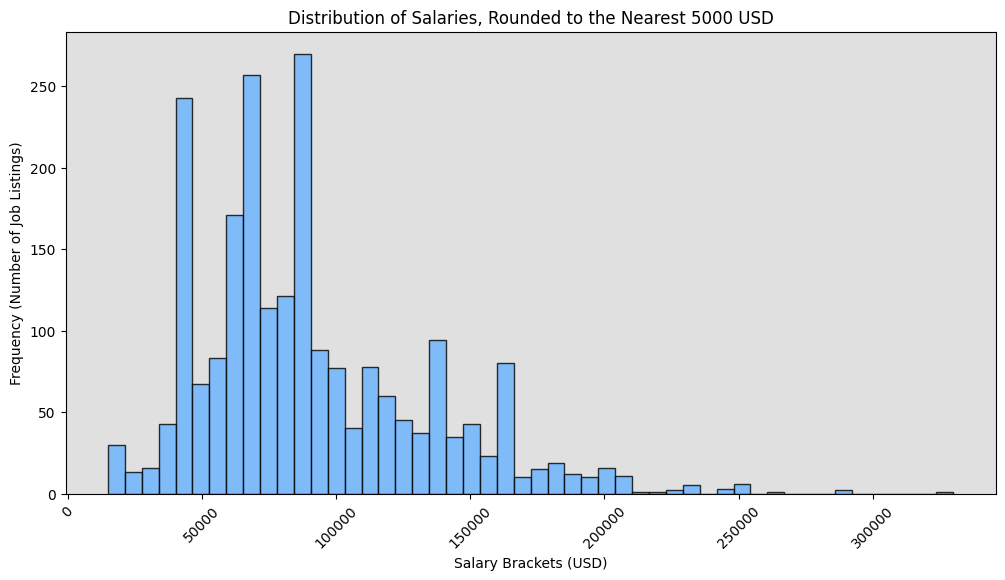

In [23]:
plt.figure(figsize=(12, 6))

plt.hist(df["Avg_Salary_Rounded"].dropna(), 
         bins=len(unique_salary_brackets_list), 
         color="#66B2FF",  
         edgecolor="black",  
         alpha=0.8)  

plt.xlabel("Salary Brackets (USD)", color="black")
plt.ylabel("Frequency (Number of Job Listings)", color="black")
plt.title("Distribution of Salaries, Rounded to the Nearest 5000 USD", color="black")
plt.xticks(rotation=45, color="black")
plt.yticks(color="black")

plt.gca().set_facecolor("#E0E0E0")

plt.show()

### Boxplot: Salary Distribution by Job Title

In [24]:
salary_by_title = df.groupby("Job_Title")["Avg_Salary_Rounded"].mean().sort_values(ascending=False)
salary_by_title

Job_Title
Machine Learning Engineer    119123.173278
Analytics Consultant         109583.333333
Data Engineer                 86936.073059
Data Scientist                81097.178683
Data Analyst                  65562.913907
Name: Avg_Salary_Rounded, dtype: float64

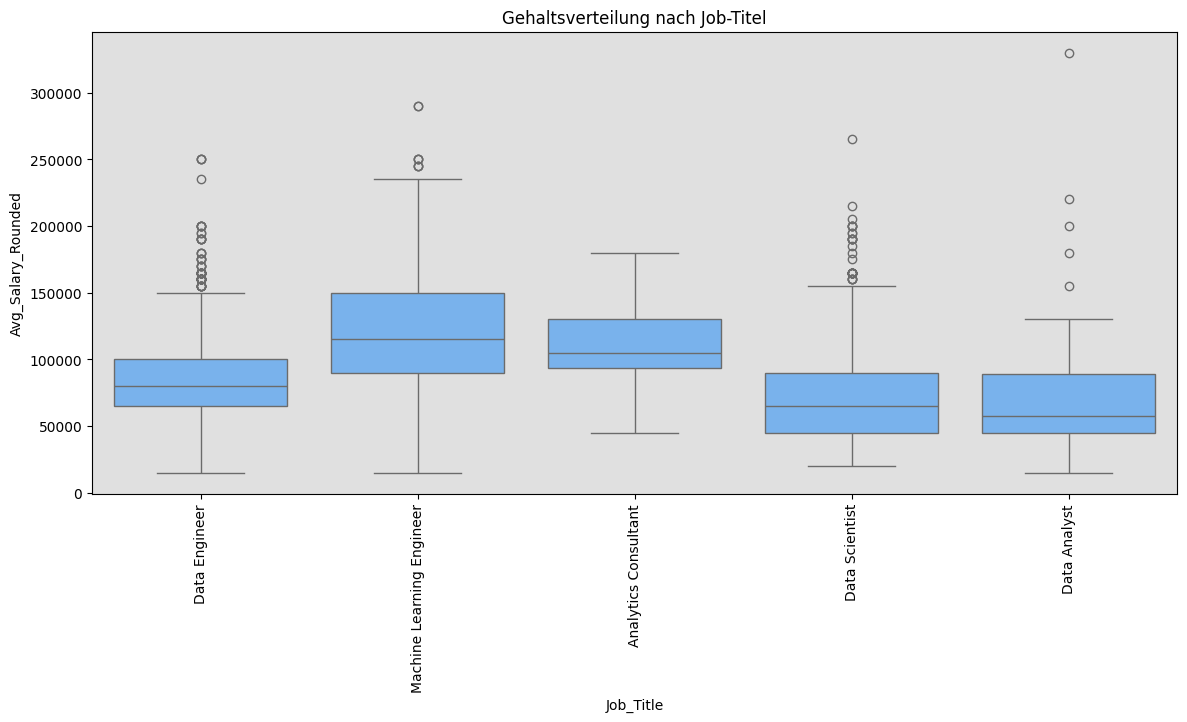

In [25]:
plt.figure(figsize=(14, 6))

sns.boxplot(data=df, 
            x="Job_Title", 
            y="Avg_Salary_Rounded", 
            color="#66B2FF")  


plt.xticks(rotation=90, color="black")
plt.yticks(color="black")

plt.title("Gehaltsverteilung nach Job-Titel", color="black")

plt.gca().set_facecolor("#E0E0E0")

plt.show()


### Bar Chart: Average Salary by Job Title

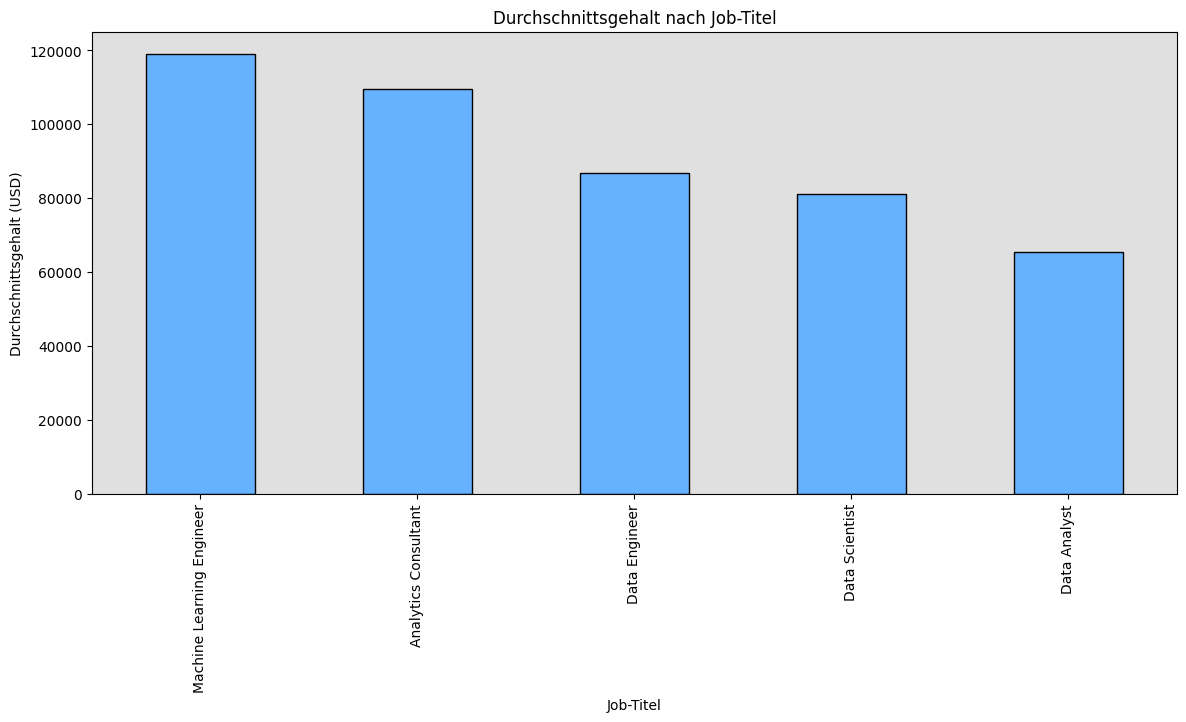

In [26]:
salary_by_title = df.groupby("Job_Title")["Avg_Salary_Rounded"].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))

salary_by_title.plot(kind="bar", color="#66B2FF", edgecolor="black")

plt.xlabel("Job-Titel", color="black")
plt.ylabel("Durchschnittsgehalt (USD)", color="black")
plt.title("Durchschnittsgehalt nach Job-Titel", color="black")
plt.xticks(rotation=90, color="black")
plt.yticks(color="black")

plt.gca().set_facecolor("#E0E0E0")

plt.show()

### Visualization of Salary Brackets vs. Experience

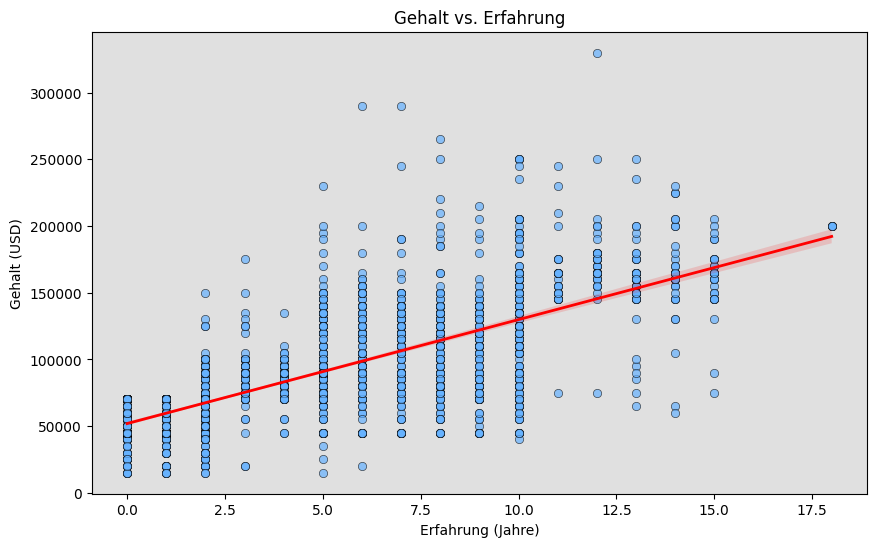

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, 
                x="Experience_years", 
                y="Avg_Salary_Rounded", 
                color="#66B2FF",  
                edgecolor="black", 
                alpha=0.7)

sns.regplot(data=df, 
            x="Experience_years", 
            y="Avg_Salary_Rounded", 
            scatter=False,  
            color="red",  
            line_kws={"linewidth": 2})  

plt.xlabel("Erfahrung (Jahre)", color="black")
plt.ylabel("Gehalt (USD)", color="black")
plt.title("Gehalt vs. Erfahrung", color="black")
plt.xticks(color="black")
plt.yticks(color="black")
plt.gca().set_facecolor("#E0E0E0")

plt.show()

### Relationship Between Skills & Salary Brackets

In [28]:
df.columns = df.columns.str.lower()

In [29]:
actual_skill_columns = [col for col in df.columns if col in [
    "aws", "docker", "azure", "big_data", "data_pipelines", "deep_learning", "etl",
    "gcp", "hadoop", "java", "kpi", "kafka", "kubernetes", "machine_learning",
    "pandas", "power_bi", "pytorch", "python", "r", "sql", "snowflake", "spark",
    "tableau", "tensorflow"
]]

In [30]:
skill_salary = df[actual_skill_columns].apply(lambda col: df.loc[col == 1, "avg_salary_rounded"].mean())
skill_salary = skill_salary.sort_values(ascending=False)

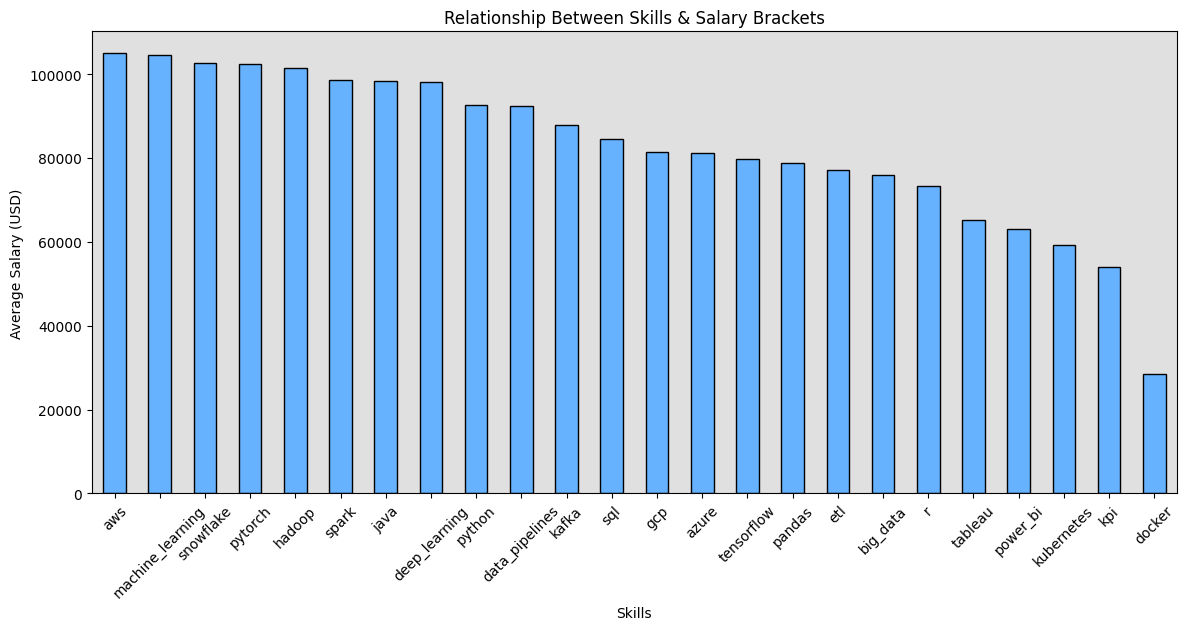

In [31]:
plt.figure(figsize=(14, 6))
skill_salary.plot(kind="bar", color="#66B2FF", edgecolor="black")

plt.xlabel("Skills", color="black")
plt.ylabel("Average Salary (USD)", color="black")
plt.title("Relationship Between Skills & Salary Brackets", color="black")

plt.xticks(rotation=45, color="black")
plt.yticks(color="black")

plt.gca().set_facecolor("#E0E0E0")

plt.show()

In [32]:
skill_salary_series = df[actual_skill_columns].apply(lambda col: df.loc[col == 1, "avg_salary_rounded"].mean())
skill_salary_series = skill_salary_series.sort_values(ascending=False)
skill_salary_series

aws                 104950.248756
machine_learning    104536.213469
snowflake           102631.578947
pytorch             102500.000000
hadoop              101388.888889
spark                98550.724638
java                 98500.000000
deep_learning        98048.780488
python               92757.793765
data_pipelines       92336.065574
kafka                87941.176471
sql                  84553.140097
gcp                  81400.000000
azure                81138.996139
tensorflow           79666.666667
pandas               78888.888889
etl                  77178.217822
big_data             76081.632653
r                    73442.211055
tableau              65312.500000
power_bi             63178.294574
kubernetes           59200.000000
kpi                  54032.258065
docker               28571.428571
dtype: float64

## The top-paying skills are:

| **Skill**               | **Average Salary (USD)**  |
|------------------------|------------------------|
| **Machine Learning**   | $104,612 |
| **Snowflake**         | $102,631 |
| **PyTorch**          | $102,500 |
| **Hadoop**           | $101,388 |
| **Spark**            | $98,550 |

### **Possible Explanations:**
**Machine Learning, PyTorch, TensorFlow**  
- Highly specialized AI/ML skills.
- Demand for AI engineers is **high**, but **supply is lower**.
- Companies pay a premium for **ML engineers with deep learning expertise**.

**Snowflake, Hadoop, Spark, Kafka** (Big Data & Cloud Technologies)  
- Handling **large-scale data** is crucial for modern businesses.
- **Snowflake, Spark, and Hadoop** are widely used in **data engineering and analytics**.
- Companies working with **big data processing pipelines** pay well.

**Cloud Computing (AWS, Azure, GCP)**  
- Many organizations are **migrating to the cloud**, making certified professionals highly valuable.

---

## **2. Mid-Tier Paying Skills**
| **Skill**             | **Average Salary (USD)**  |
|----------------------|------------------------|
| **Python**           | $92,757 |
| **SQL**             | $84,553 |
| **Azure**           | $81,138 |
| **TensorFlow**      | $79,666 |
| **Pandas**          | $78,888 |

### **Possible Explanations:**
**Python, SQL, Pandas**  
- **Essential for data science & software development** but also **more common**.
- Python salaries depend on the **specific field** (e.g., automation vs. AI).
- **SQL & Pandas** are fundamental for data analytics, but demand is **lower than ML or Cloud**.

**Azure, GCP, TensorFlow**  
- **Cloud** and **AI tools** remain in demand, but salaries are **moderate** compared to Snowflake/ML roles.
- **TensorFlow** is commonly used in AI but may have lower salaries than **PyTorch**.

---

## **3. Lower-Paying Skills**
| **Skill**             | **Average Salary (USD)**  |
|----------------------|------------------------|
| **Big Data**         | $76,081 |
| **R**               | $73,442 |
| **Tableau**         | $65,312 |
| **Power BI**        | $63,178 |
| **Kubernetes**      | $59,200 |
| **KPI**             | $54,032 |
| **Docker**          | $28,571 |

### **Possible Explanations:**
**Tableau, Power BI, KPI (Business Intelligence & Visualization Tools)**  
- These skills are useful for business analysts but **don’t require deep technical expertise**.
- Many BI roles are **not as specialized** as **ML or Cloud Engineering**.

**Kubernetes, Docker (Containerization & DevOps)**  
- **Kubernetes & Docker** are important DevOps skills, but their salaries are **lower**.
- This may be due to **more professionals entering the DevOps space**, increasing supply.
- **Docker has the lowest average salary**, likely because **basic Docker skills are easier to learn**.

**R (Statistical Programming Language)**  
- **R** is used for **academic research and statistical computing**.
- Its **industry adoption** is lower compared to **Python**, so salaries tend to be **lower**.

---

## **Key Takeaways**
1. **Specialized & In-Demand Skills Pay the Most**  
   - **Machine Learning, Snowflake, and Cloud technologies** command **higher salaries** due to demand and complexity.
   
2. **Foundational Skills Pay Well, But Not at the Top**  
   - **Python, SQL, and Pandas** are crucial but **more common**, leading to **moderate salaries**.

3. **Visualization & DevOps Tools Have Lower Salaries**  
   - **Tableau, Power BI, and Docker** are widely use


### Top Skills per Experience Level

In [33]:
df.columns = df.columns.str.strip().str.lower()

In [34]:
skill_columns = [
    "aws", "docker", "azure", "big_data", "data_pipelines", "deep_learning", "etl",
    "gcp", "hadoop", "java", "kpi", "kafka", "kubernetes", "machine_learning",
    "pandas", "power_bi", "pytorch", "python", "r", "sql", "snowflake", "spark",
    "tableau", "tensorflow"
]

In [35]:
experience_levels = df["experience_level"].unique()

In [36]:
top_skills_per_experience = {}

for level in experience_levels:
    
    df_experience = df[df["experience_level"] == level]

    skill_counts = df_experience[skill_columns].sum().sort_values(ascending=False)

    top_skills_per_experience[level] = skill_counts.head(5)

top_skills_df = pd.DataFrame(top_skills_per_experience)


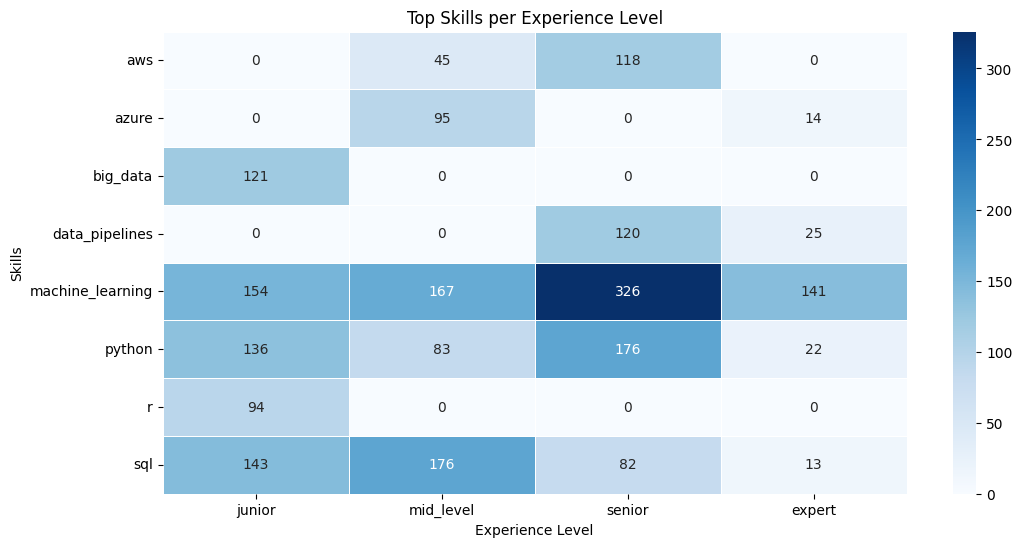

In [37]:
plt.figure(figsize=(12, 6))
sns.heatmap(top_skills_df.fillna(0), cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)

plt.xlabel("Experience Level", color="black")
plt.ylabel("Skills", color="black")
plt.title("Top Skills per Experience Level", color="black")

plt.gca().set_facecolor("#E0E0E0")

plt.show()


### Key Insights:
AWS & Azure appear frequently at mid-level and senior positions, showing strong demand for cloud expertise.
Big Data seems more relevant for junior-level positions, possibly indicating entry-level data roles.
Machine Learning is popular across all experience levels, but is most in demand for senior roles.
Data Pipelines become more important for senior and expert-level roles, likely due to the complexity of large-scale data management.

### Distribution of Experience Level Overall

In [38]:
print(df.columns)

Index(['job_title', 'company', 'location', 'salary_min', 'salary_max',
       'description', 'extracted_skills', 'longitude', 'latitude', 'url',
       'created', 'experience_years', 'experience_level', 'scikit_learn',
       'aws', 'docker', 'google_analytics', 'apache_airflow', 'azure',
       'big_data', 'data_pipelines', 'deep_learning', 'etl', 'gcp', 'hadoop',
       'java', 'kpi', 'kafka', 'kubernetes', 'machine_learning', 'pandas',
       'power_bi', 'pytorch', 'python', 'r', 'sql', 'snowflake', 'spark',
       'tableau', 'tensorflow', 'avg_salary', 'skills',
       'experience_level_encoded', 'job_title_encoded', 'avg_salary_rounded'],
      dtype='object')


In [39]:
df["experience_level"] = df["experience_level"].astype(str).str.strip()  

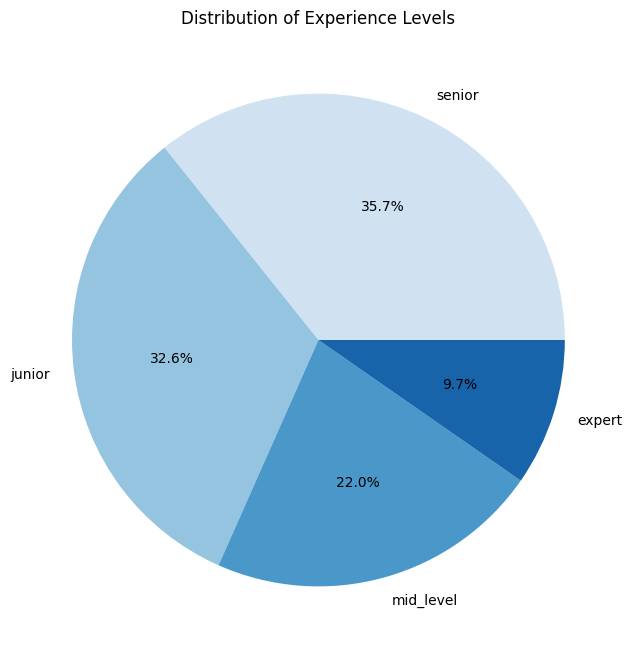

In [40]:
experience_counts = df["experience_level"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Blues", len(experience_counts)))

plt.title("Distribution of Experience Levels", color="black")

plt.show()

## **Key Observations**
- The histogram shows the distribution of **experience levels** across job postings.
- Some experience levels appear **more frequently** than others.
- There may be a **higher demand for mid-level roles** compared to entry-level or senior positions.

---

## **Possible Reasons for These Results**

### **1. Industry Demand for Mid-Level Professionals**
- Many companies **prefer hiring mid-level professionals** because they have **relevant experience** but require **less training than entry-level candidates**.
- Mid-level employees **cost less** than senior professionals while still bringing valuable expertise.

### **2. Fewer Senior-Level Openings**
- Senior positions are **less frequently listed** since companies often **promote internally** instead of hiring externally.
- Hiring for **executive roles** is often done through **networking, referrals, or headhunters**, which may not reflect in standard job postings.

### **3. Entry-Level Roles May Be Industry-Specific**
- Some industries (e.g., **tech and finance**) tend to **hire more mid-level candidates** because entry-level candidates **lack specialized skills**.
- In contrast, industries with **structured training programs** (e.g., consulting, retail) **hire more entry-level employees**.

### **4. Economic Factors & Hiring Trends**
- Economic downturns or **recessions** may result in **fewer senior-level job openings**, as companies **reduce costs**.
- Rapidly growing industries (e.g., AI, cloud computing) may **hire more junior engineers** to **scale teams quickly**.


### Distribution of Experience Level per Job

In [41]:
df.columns = df.columns.str.strip().str.lower()  

In [42]:
top_job_titles = df["job_title"].value_counts().index[:10]

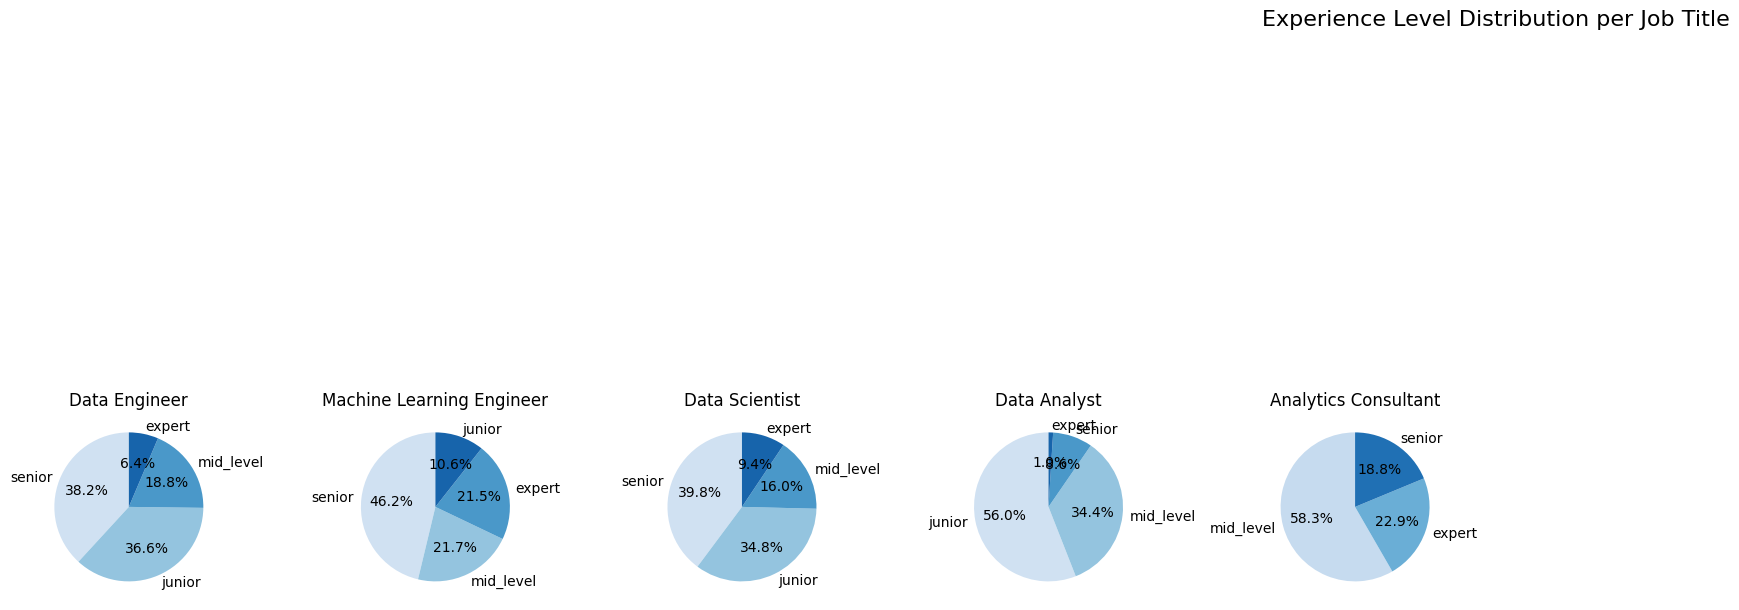

In [43]:
fig, axes = plt.subplots(1, 10, figsize=(30, 10)) 

for ax, job_title in zip(axes, top_job_titles):
    experience_counts = df[df["job_title"] == job_title]["experience_level"].value_counts()

    ax.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', 
           colors=sns.color_palette("Blues", len(experience_counts)), startangle=90)

    ax.set_title(job_title, color="black")

for ax in axes[len(top_job_titles):]:
    ax.remove()

plt.suptitle("Experience Level Distribution per Job Title", fontsize=16, color="black")
plt.tight_layout()
plt.show()


# Salary Predictions per Job Title and Skills

## Random Forest

### Prepare the Data

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
df.columns = df.columns.str.strip().str.lower()

In [46]:
features = ["experience_level_encoded", "job_title_encoded"] + [
    "aws", "docker", "azure", "big_data", "data_pipelines", "deep_learning",
    "etl", "gcp", "hadoop", "java", "kpi", "kafka", "kubernetes", "machine_learning",
    "pandas", "power_bi", "pytorch", "python", "r", "sql", "snowflake", "spark",
    "tableau", "tensorflow"
]

target = "avg_salary_rounded"

In [47]:
df = df.dropna(subset=[target])

X = df[features]
y = df[target]

### Split the Dataset into Training & Test Sets

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train a Machine Learning Model

In [49]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train) 

RandomForestRegressor(random_state=42)

### Make Predictions & Evaluate Model

In [50]:
y_pred = model.predict(X_test)

In [51]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [52]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")

Mean Absolute Error (MAE): 14256.33
Root Mean Squared Error (RMSE): 23221.84
R-squared (R²) Score: 0.6968


### 1. Mean Absolute Error (MAE) = $14,256.33
What it means:

On average, the model’s predictions differ from actual salaries by about $14,256.
A lower MAE would indicate better accuracy.
Good: The MAE is relatively low, meaning the model is somewhat accurate in predicting salaries.
Bad: If salary ranges are tight, an error of ~$14K might be significant.

### 2. Root Mean Squared Error (RMSE) = $23,221.84
What it means:

RMSE gives more weight to larger errors compared to MAE.
The model's typical error is $23,221 when predicting salaries.
Good: This suggests that most salary predictions fall within ±$23K of the actual salary.
Bad: If this is too high compared to typical salaries, the model may need improvements.

### 3. R-squared (R²) Score = 0.6968
What it means:

R² measures how much of the salary variation is explained by the model.
69.68% of salary differences can be explained by the given features (experience level, job title, and skills).
The remaining 30.32% is unexplained variance (likely due to missing factors like company, location, or negotiation power).
Good: The model captures most of the variation in salaries.
Bad: There is still room for improvement—other factors (e.g., location, industry) might help.

## Optimizing the Model

In [53]:
df["company"].nunique()

712

In [54]:
df = df.drop(columns=["description", "extracted_skills", "url", "location", "salary_min", "salary_max"])

In [55]:
from sklearn.cluster import KMeans
import numpy as np

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

df["location_cluster"] = kmeans.fit_predict(df[["longitude", "latitude"]])

In [56]:
df.columns

Index(['job_title', 'company', 'longitude', 'latitude', 'created',
       'experience_years', 'experience_level', 'scikit_learn', 'aws', 'docker',
       'google_analytics', 'apache_airflow', 'azure', 'big_data',
       'data_pipelines', 'deep_learning', 'etl', 'gcp', 'hadoop', 'java',
       'kpi', 'kafka', 'kubernetes', 'machine_learning', 'pandas', 'power_bi',
       'pytorch', 'python', 'r', 'sql', 'snowflake', 'spark', 'tableau',
       'tensorflow', 'avg_salary', 'skills', 'experience_level_encoded',
       'job_title_encoded', 'avg_salary_rounded', 'location_cluster'],
      dtype='object')

In [57]:
df = df.drop(columns=["longitude", "latitude", "created", "skills"])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2243 entries, 0 to 2243
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   job_title                 2243 non-null   object 
 1   company                   2243 non-null   object 
 2   experience_years          2243 non-null   int64  
 3   experience_level          2243 non-null   object 
 4   scikit_learn              2243 non-null   int64  
 5   aws                       2243 non-null   int64  
 6   docker                    2243 non-null   int64  
 7   google_analytics          2243 non-null   int64  
 8   apache_airflow            2243 non-null   int64  
 9   azure                     2243 non-null   int64  
 10  big_data                  2243 non-null   int64  
 11  data_pipelines            2243 non-null   int64  
 12  deep_learning             2243 non-null   int64  
 13  etl                       2243 non-null   int64  
 14  gcp          

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["job_title"] = le.fit_transform(df["job_title"])

In [60]:
df["company_encoded"] = df.groupby("company")["avg_salary"].transform("mean")

In [61]:
top_companies = df["company"].value_counts().index[:100]
df["company"] = df["company"].apply(lambda x: x if x in top_companies else "Other")

In [62]:
df = pd.get_dummies(df, columns=["company"], drop_first=True)

In [63]:
df["experience_level"] = df["experience_level"].map({"junior": 0, "mid_level": 1, "senior": 2, "expert" : 3})

In [64]:
df = df.dropna()

In [65]:
df.isnull().sum()

job_title                    0
experience_years             0
experience_level             0
scikit_learn                 0
aws                          0
                            ..
company_YO HR CONSULTANCY    0
company_Yosh.AI              0
company_Zone IT Solutions    0
company_emagine Polska       0
company_smartpatient         0
Length: 136, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2243 entries, 0 to 2243
Columns: 136 entries, job_title to company_smartpatient
dtypes: bool(100), float64(4), int32(1), int64(31)
memory usage: 858.6 KB


In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["avg_salary", "experience_years"]] = scaler.fit_transform(df[["avg_salary", "experience_years"]])

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X = df.drop(columns=["avg_salary"])
y = df["avg_salary"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.01435597201460928
R² Score: 0.9993498287251625


In [69]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
import pandas as pd

In [70]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Lineare Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),  
    "SVR": SVR(kernel="rbf", C=100, gamma=0.1)
}

In [71]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    mae = mean_absolute_error(y_test, y_pred)  
    r2 = r2_score(y_test, y_pred)  
    results.append({"Modell": name, "MAE": mae, "R² Score": r2})  

In [72]:
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)
print(results_df)


               Modell       MAE  R² Score
0       Random Forest  0.014356  0.999350
1  Lineare Regression  0.026206  0.998911
2    Lasso Regression  0.030599  0.998764
3                 SVR  0.302636  0.713968
